In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# 데이터 파일 경로
file_path = '../../data/school_health_preprocessed.csv'

# 데이터 읽기

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")

# 데이터의 첫 5행 출력
print(data.head())

# 데이터 정보 확인
print("\n데이터 정보:")
print(data.info())

# 결측치 개수 확인
print("\n결측치 확인:")
print(data.isnull().sum())


데이터 로드 성공!
    학년도       최종가중치  학교ID    도시규모  공학여부  시도 학교급  학년  반  순번  ... 흡연음주전문가상담희망  \
0  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   1  ...         NaN   
1  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   2  ...         NaN   
2  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   3  ...         NaN   
3  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   4  ...         NaN   
4  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   5  ...         NaN   

  무기력감 수업태도교정  과잉행동  주의력산만 성문제전문가상담희망  진로고민  상담요청    키_m        BMI  
0  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.107  15.667728  
1  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.125  15.644444  
2  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.253  15.159148  
3  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.161  22.701628  
4  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.194  14.870556  

[5 rows x 111 columns]

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84871 entri

In [3]:
# 모든 열 이름 확인
print("Column Names:")
print(data.columns)

# 각 열의 결측치 개수 확인
print("\n결측치 수 :")
print(data.isnull().sum())

print("\n결측치 in '하루30이상운동':")
print(data['하루30분이상운동'].isnull().sum())

print("\n결측치 in '주3회이상운동':")
print(data['주3회이상운동'].isnull().sum())

Column Names:
Index(['학년도', '최종가중치', '학교ID', '도시규모', '공학여부', '시도', '학교급', '학년', '반', '순번',
       ...
       '흡연음주전문가상담희망', '무기력감', '수업태도교정', '과잉행동', '주의력산만', '성문제전문가상담희망', '진로고민',
       '상담요청', '키_m', 'BMI'],
      dtype='object', length=111)

결측치 수 :
학년도               0
최종가중치             0
학교ID              0
도시규모              0
공학여부              0
              ...  
성문제전문가상담희망    35146
진로고민          35129
상담요청           2468
키_m               0
BMI               0
Length: 111, dtype: int64

결측치 in '하루30이상운동':
35081

결측치 in '주3회이상운동':
52156


In [4]:
import pandas as pd

# 필요한 열 추출
df = data[['BMI', '주3회이상운동', '학교급', '성별', '하루30분이상운동']]

# '주3회이상운동' 관련 데이터 결측치 제거
cleaned_data_exercise_3times = df.dropna(subset=['BMI', '주3회이상운동', '학교급', '성별'])
print(f"Cleaned data size for 주3회이상운동: {cleaned_data_exercise_3times.shape}")
print(cleaned_data_exercise_3times.head())

# '주3회이상운동' 매핑 : 초등학생 대상
exercise_mapping_3times = {
    1.0: '예',
    2.0: '아니오'
}

cleaned_data_exercise_3times['주 3회 운동여부'] = cleaned_data_exercise_3times['주3회이상운동'].map(exercise_mapping_3times)
print("\n[주3회이상운동 매핑 결과 (초등학생 대상)]")
print(cleaned_data_exercise_3times[['BMI', '주3회이상운동', '주 3회 운동여부','성별','학교급']].head())

# '하루30분이상운동' 관련 데이터 결측치 제거
cleaned_data_exercise_30min = df.dropna(subset=['BMI', '하루30분이상운동', '학교급', '성별'])
print(f"Cleaned data size for 하루30분이상운동: {cleaned_data_exercise_30min.shape}")
print(cleaned_data_exercise_30min.head())

# '하루30분이상운동' 매핑 : 중, 고등학생 대상
exercise_mapping_30min = {
    1.0: '거의 안함',
    2.0: '주에 1~2회',
    3.0: '주에 3~4회',
    4.0: '주에 5회 이상'
}

cleaned_data_exercise_30min['운동빈도'] = cleaned_data_exercise_30min['하루30분이상운동'].map(exercise_mapping_30min)
print("\n[하루30분이상운동 매핑 결과 (중, 고등학생 대상)]")
print(cleaned_data_exercise_30min[['BMI', '하루30분이상운동', '운동빈도','성별','학교급']].head())


Cleaned data size for 주3회이상운동: (32715, 5)
         BMI  주3회이상운동 학교급 성별  하루30분이상운동
0  15.667728      2.0   초  여        NaN
1  15.644444      2.0   초  여        NaN
2  15.159148      2.0   초  여        NaN
3  22.701628      2.0   초  여        NaN
4  14.870556      1.0   초  여        NaN

[주3회이상운동 매핑 결과 (초등학생 대상)]
         BMI  주3회이상운동 주 3회 운동여부 성별 학교급
0  15.667728      2.0       아니오  여   초
1  15.644444      2.0       아니오  여   초
2  15.159148      2.0       아니오  여   초
3  22.701628      2.0       아니오  여   초
4  14.870556      1.0         예  여   초
Cleaned data size for 하루30분이상운동: (49790, 5)
             BMI  주3회이상운동 학교급 성별  하루30분이상운동
29623  15.238947      NaN   중  남        3.0
29624  20.342891      NaN   중  여        1.0
29625  24.689836      NaN   중  남        3.0
29626  20.877623      NaN   중  여        2.0
29627  17.201060      NaN   중  여        1.0

[하루30분이상운동 매핑 결과 (중, 고등학생 대상)]
             BMI  하루30분이상운동     운동빈도 성별 학교급
29623  15.238947        3.0  주에 3~4회  남   중
29624  20.342891        1.0  

/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/1123144500.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_exercise_3times['주 3회 운동여부'] = cleaned_data_exercise_3times['주3회이상운동'].map(exercise_mapping_3times)
/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/1123144500.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_exercise_30min['운동빈도'] = cleaned_data_exercise_30min['하루30분이상운동'].map(exercise_mapping_30min)


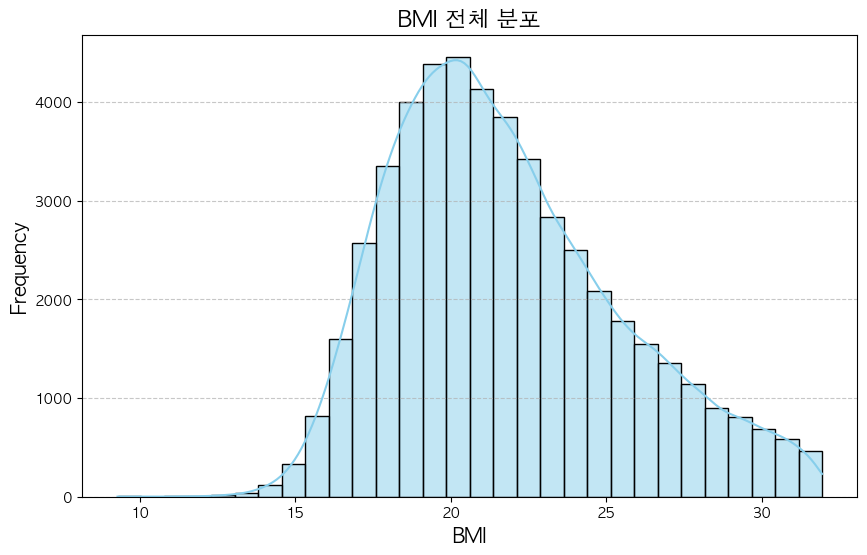

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#BMI 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data_exercise_30min, x='BMI', kde=True, bins=30, color='skyblue')
plt.title('BMI 전체 분포', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/19847598.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data_exercise_3times, x='주 3회 운동여부', palette='coolwarm', order=['예', '아니오'])


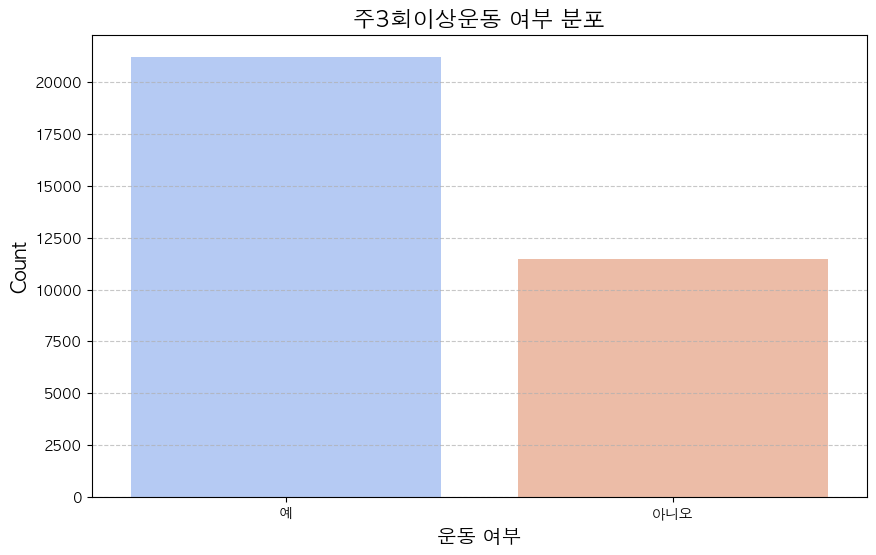

/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/19847598.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data_exercise_30min, x='운동빈도', palette='coolwarm', order=exercise_order)


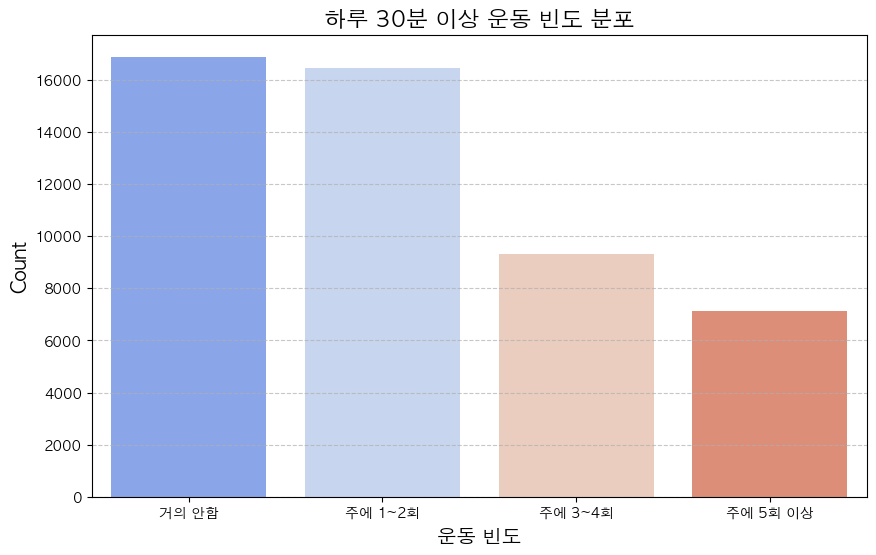


[주3회 이상 운동 여부 데이터 개수]
주 3회 운동여부
예      21236
아니오    11479
Name: count, dtype: int64

[하루 30분 이상 운동 빈도 데이터 개수]
운동빈도
거의 안함       16889
주에 1~2회     16440
주에 3~4회      9324
주에 5회 이상     7137
Name: count, dtype: int64


In [ ]:
# 운동 분포 시각화 

import matplotlib.pyplot as plt
import seaborn as sns

# '운동빈도' 순서 지정
exercise_order = ['거의 안함', '주에 1~2회', '주에 3~4회', '주에 5회 이상']

# 주3회 이상 운동 여부 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data_exercise_3times, x='주 3회 운동여부', palette='coolwarm', order=['예', '아니오'])
plt.title('주3회이상운동 여부 분포', fontsize=16)
plt.xlabel('운동 여부', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 하루 30분 이상 운동 빈도 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data_exercise_30min, x='운동빈도', palette='coolwarm', order=exercise_order)
plt.title('하루 30분 이상 운동 빈도 분포', fontsize=16)
plt.xlabel('운동 빈도', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 데이터 개수 출력
exercise_counts_3times = cleaned_data_exercise_3times['주 3회 운동여부'].value_counts()
exercise_counts_30min = cleaned_data_exercise_30min['운동빈도'].value_counts()

print("\n[주3회 이상 운동 여부 데이터 개수]")
print(exercise_counts_3times)

print("\n[하루 30분 이상 운동 빈도 데이터 개수]")
print(exercise_counts_30min)



[주 3회 이상 운동 여부와 성별의 교차표]
주 3회 운동여부   아니오      예
성별                    
남성         4515  12238
여성         6964   8998

[카이제곱 검정 결과]
Chi2 Statistic: 997.5413, p-value: 0.0000, Degrees of Freedom: 1


/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/565360339.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data_3times['성별'] = '남성'
/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/565360339.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data_3times['성별'] = '여성'


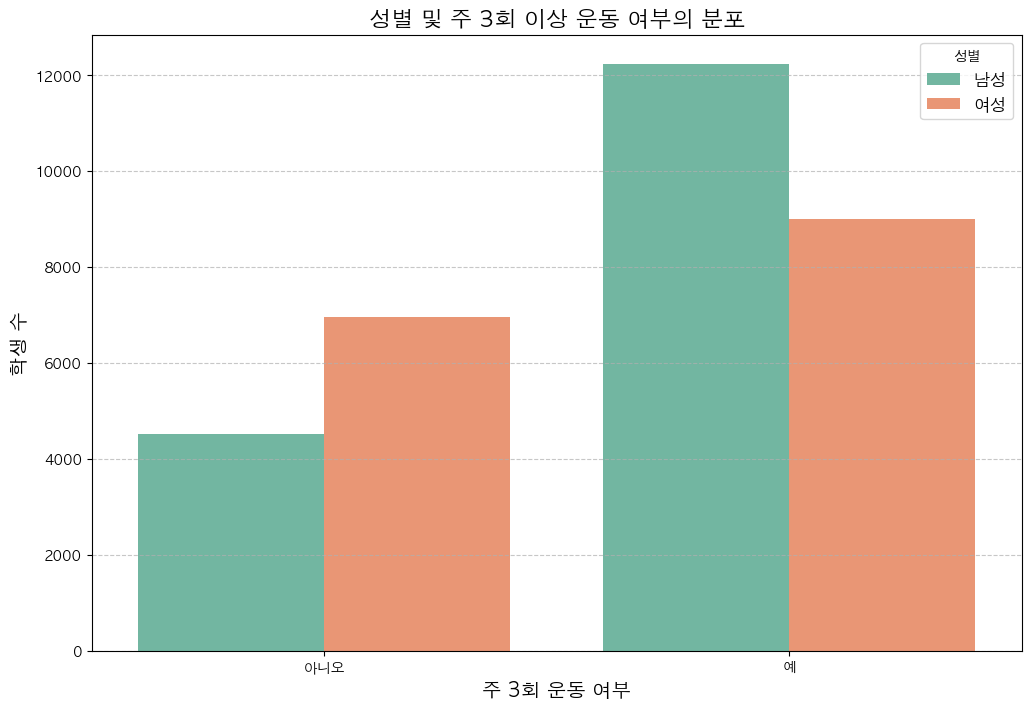

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import chi2_contingency

# 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 주 3회 운동 여부 데이터 준비
male_data_3times = cleaned_data_exercise_3times[cleaned_data_exercise_3times['성별'] == '남']
female_data_3times = cleaned_data_exercise_3times[cleaned_data_exercise_3times['성별'] == '여']

# 성별 추가 후 데이터 통합
male_data_3times['성별'] = '남성'
female_data_3times['성별'] = '여성'
combined_data_3times = pd.concat([male_data_3times, female_data_3times], ignore_index=True)

# 성별 및 주 3회 운동 여부에 대한 교차표 생성
gender_exercise_contingency_3times = pd.crosstab(combined_data_3times['성별'], combined_data_3times['주 3회 운동여부'])

# 카이제곱 검정 수행
chi2_3times, p_3times, dof_3times, expected_3times = chi2_contingency(gender_exercise_contingency_3times)

# 결과 출력
print("\n[주 3회 이상 운동 여부와 성별의 교차표]")
print(gender_exercise_contingency_3times)

print("\n[카이제곱 검정 결과]")
print(f"Chi2 Statistic: {chi2_3times:.4f}, p-value: {p_3times:.4f}, Degrees of Freedom: {dof_3times}")

# 시각화: 성별 및 주 3회 이상 운동 여부 비율
plt.figure(figsize=(12, 8))
sns.countplot(
    data=combined_data_3times,
    x='주 3회 운동여부',
    hue='성별',
    palette='Set2'
)
plt.title('성별 및 주 3회 이상 운동 여부의 분포', fontsize=16)
plt.xlabel('주 3회 운동 여부', fontsize=14)
plt.ylabel('학생 수', fontsize=14)
plt.legend(title='성별', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


p-value가 0.0000으로 매우 작습니다. 이는 일반적인 유의수준(α=0.05) 하에서 귀무가설을 기각합니다.

귀무가설: 주 3회 이상 운동 여부와 성별은 독립적이다.
대립가설: 주 3회 이상 운동 여부와 성별은 독립적이지 않다.
따라서 주 3회 이상 운동 여부와 성별 간에는 유의미한 연관성이 있다고 판단됩니다.

남성의 경우 주 3회 이상 운동을 하는 비율이 높고(12238/16753 ≈ 73%),
여성의 경우 주 3회 이상 운동을 하지 않는 비율이 상대적으로 더 높습니다(6964/15962 ≈ 44%).


[운동 빈도별 성별 분포]
운동빈도      성별
거의 안함     여성    10913
          남성     5976
주에 1~2회   여성     8697
          남성     7743
주에 3~4회   남성     6001
          여성     3323
주에 5회 이상  남성     5313
          여성     1824
Name: count, dtype: int64


/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/2307301671.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data_30min['성별'] = '남성'
/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_97049/2307301671.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data_30min['성별'] = '여성'


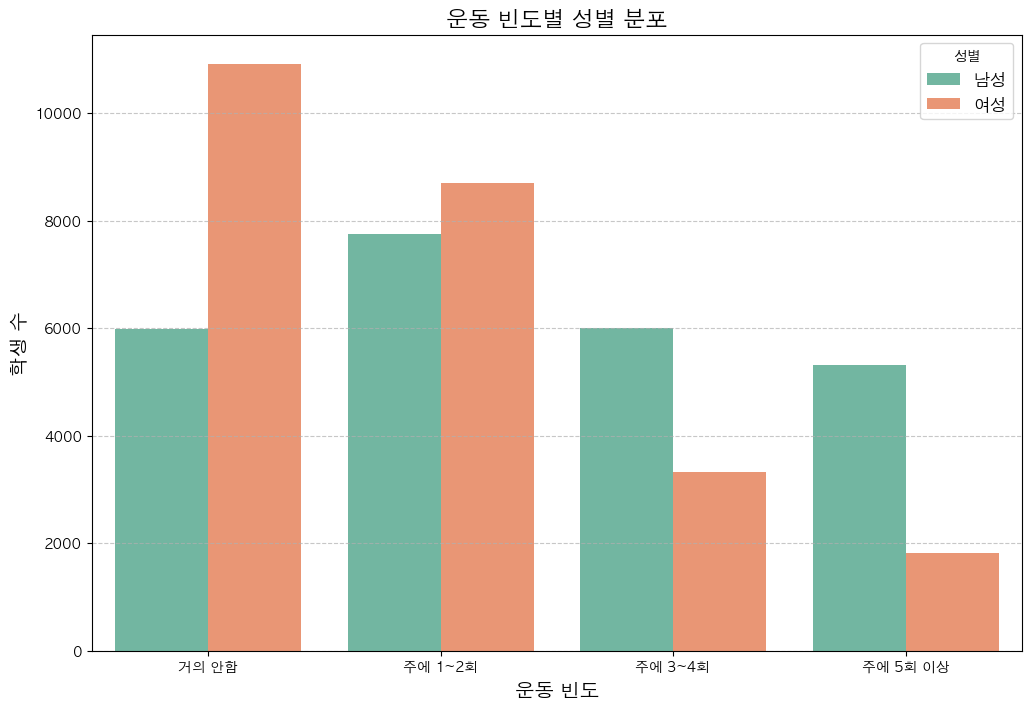


[운동 빈도 및 성별의 교차표]
성별          남성     여성
운동빈도                 
거의 안함     5976  10913
주에 1~2회   7743   8697
주에 3~4회   6001   3323
주에 5회 이상  5313   1824

[카이제곱 검정 결과]
Chi2 Statistic: 3971.9374, p-value: 0.0000, Degrees of Freedom: 3

[기대 빈도]
성별                 남성           여성
운동빈도                              
거의 안함     8491.310243  8397.689757
주에 1~2회   8265.565776  8174.434224
주에 3~4회   4687.842780  4636.157220
주에 5회 이상  3588.281201  3548.718799


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import chi2_contingency

# 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
male_data_30min = cleaned_data_exercise_30min[cleaned_data_exercise_30min['성별'] == '남']
female_data_30min = cleaned_data_exercise_30min[cleaned_data_exercise_30min['성별'] == '여']

# 성별 추가 후 데이터 통합
male_data_30min['성별'] = '남성'
female_data_30min['성별'] = '여성'
combined_data_30min = pd.concat([male_data_30min, female_data_30min], ignore_index=True)

# 성별 및 운동 빈도의 분포 출력
print("\n[운동 빈도별 성별 분포]")
print(combined_data_30min.groupby('운동빈도')['성별'].value_counts())

# 시각화: 성별 및 운동 빈도의 분포
plt.figure(figsize=(12, 8))
sns.countplot(
    data=combined_data_30min,
    x='운동빈도',
    hue='성별',
    palette='Set2',
    order=['거의 안함', '주에 1~2회', '주에 3~4회', '주에 5회 이상']
)
plt.title('운동 빈도별 성별 분포', fontsize=16)
plt.xlabel('운동 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)
plt.legend(title='성별', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 교차표 생성
gender_exercise_contingency = pd.crosstab(combined_data_30min['운동빈도'], combined_data_30min['성별'])

# 교차표 출력
print("\n[운동 빈도 및 성별의 교차표]")
print(gender_exercise_contingency)

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(gender_exercise_contingency)
print("\n[카이제곱 검정 결과]")
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")
print("\n[기대 빈도]")
print(pd.DataFrame(expected, columns=gender_exercise_contingency.columns, index=gender_exercise_contingency.index))


p-value가 0.0000으로 매우 작아, 일반적인 유의수준(α=0.05)에서 귀무가설을 기각합니다.

귀무가설: 운동 빈도와 성별은 독립적이다.
대립가설: 운동 빈도와 성별은 독립적이지 않다.
따라서 운동 빈도와 성별 간에 유의미한 연관성이 있다고 판단됩니다.


남성은 주 3회 이상 운동(주에 3~4회, 주에 5회 이상) 비율이 높습니다.
여성은 거의 운동하지 않거나 주 1~2회 운동 비율이 상대적으로 높습니다.


[운동 빈도별 학교급 분포]
운동빈도      학교급
거의 안함     고      10470
          중       6419
주에 1~2회   고       9072
          중       7368
주에 3~4회   중       5139
          고       4185
주에 5회 이상  중       4032
          고       3105
Name: count, dtype: int64


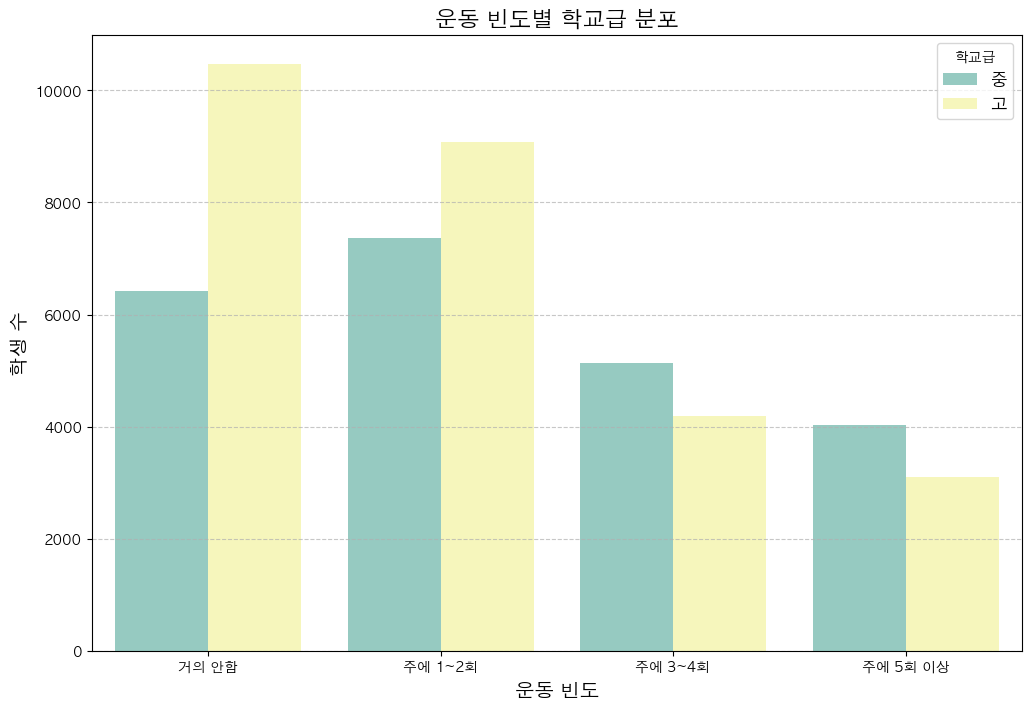


[운동 빈도 및 학교급의 교차표]
학교급           고     중
운동빈도                 
거의 안함     10470  6419
주에 1~2회    9072  7368
주에 3~4회    4185  5139
주에 5회 이상   3105  4032

[카이제곱 검정 결과]
Chi2 Statistic: 1071.3702, p-value: 0.0000, Degrees of Freedom: 3

[기대 빈도]
학교급                 고            중
운동빈도                              
거의 안함     9101.539426  7787.460574
주에 1~2회   8859.571802  7580.428198
주에 3~4회   5024.735248  4299.264752
주에 5회 이상  3846.153525  3290.846475


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import chi2_contingency

# 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비: 학교급 데이터 추가
combined_data_30min['학교급'] = combined_data_30min['학교급']  # 기존 데이터에 학교급 포함

# 운동 빈도와 학교급의 분포 출력
print("\n[운동 빈도별 학교급 분포]")
print(combined_data_30min.groupby('운동빈도')['학교급'].value_counts())

# 시각화: 운동 빈도와 학교급의 분포
plt.figure(figsize=(12, 8))
sns.countplot(
    data=combined_data_30min,
    x='운동빈도',
    hue='학교급',
    palette='Set3',
    order=['거의 안함', '주에 1~2회', '주에 3~4회', '주에 5회 이상']
)
plt.title('운동 빈도별 학교급 분포', fontsize=16)
plt.xlabel('운동 빈도', fontsize=14)
plt.ylabel('학생 수', fontsize=14)
plt.legend(title='학교급', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 교차표 생성
school_exercise_contingency = pd.crosstab(combined_data_30min['운동빈도'], combined_data_30min['학교급'])

# 교차표 출력
print("\n[운동 빈도 및 학교급의 교차표]")
print(school_exercise_contingency)

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(school_exercise_contingency)
print("\n[카이제곱 검정 결과]")
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")
print("\n[기대 빈도]")
print(pd.DataFrame(expected, columns=school_exercise_contingency.columns, index=school_exercise_contingency.index))


p-value가 0.0000으로 매우 작아, 일반적인 유의수준(α=0.05)에서 귀무가설을 기각합니다. 
-> 운동빈도별로 학교급이 다르게 분포함

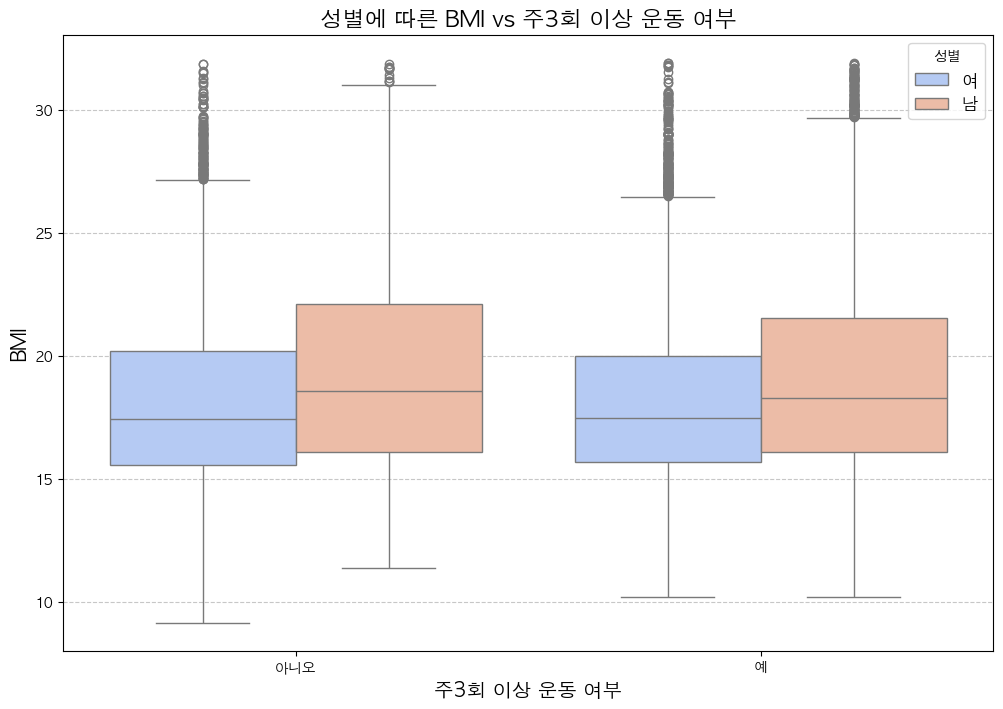

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 주3회 이상 운동 여부와 성별에 따른 BMI 분포
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data_exercise_3times, x='주 3회 운동여부', y='BMI', hue='성별', palette='coolwarm')
plt.title('성별에 따른 BMI vs 주3회 이상 운동 여부', fontsize=16)
plt.xlabel('주3회 이상 운동 여부', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='성별', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



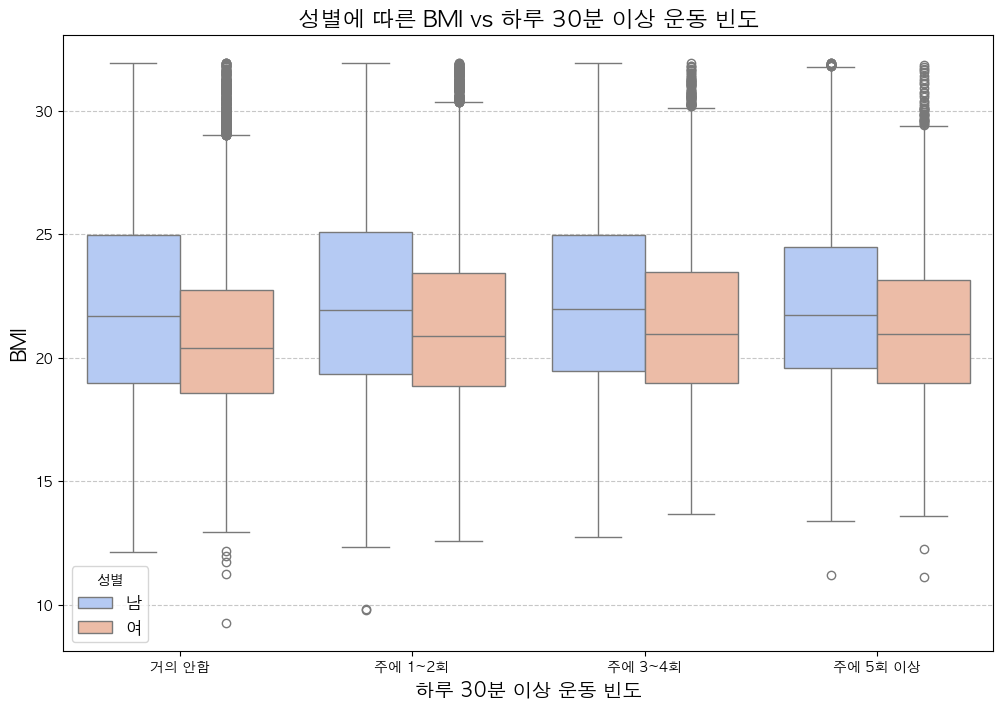

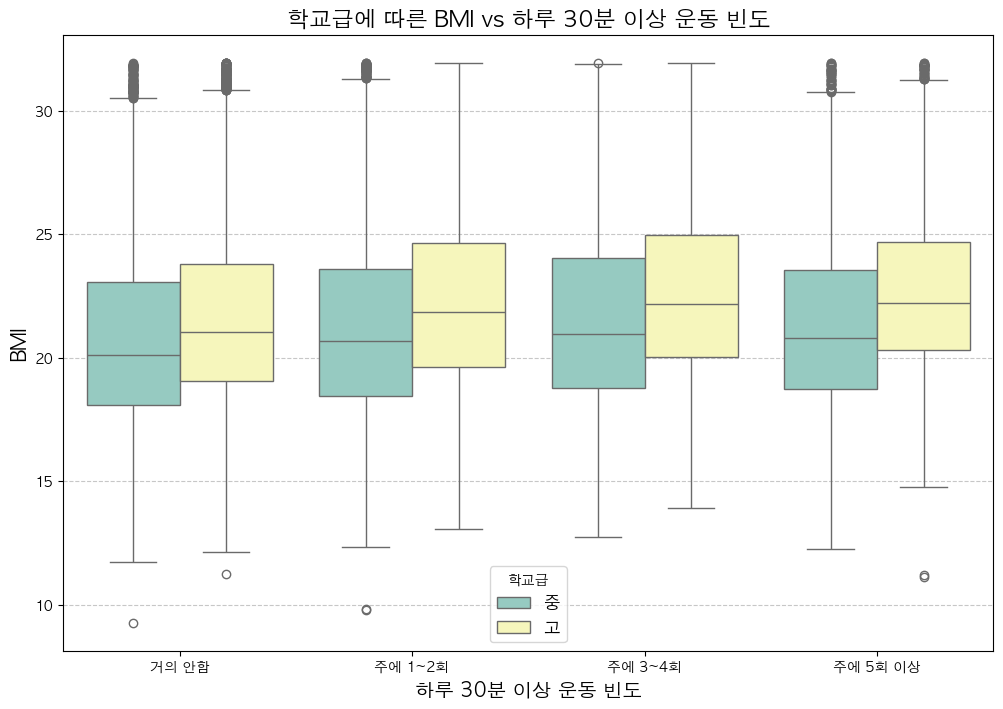

In [21]:
# 2-1. 하루 30분 이상 운동 빈도와 성별에 따른 BMI 분포
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data_exercise_30min, x='운동빈도', y='BMI', hue='성별', palette='coolwarm',
            order=['거의 안함', '주에 1~2회', '주에 3~4회', '주에 5회 이상'])
plt.title('성별에 따른 BMI vs 하루 30분 이상 운동 빈도', fontsize=16)
plt.xlabel('하루 30분 이상 운동 빈도', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='성별', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2-2. 하루 30분 이상 운동 빈도와 학교급에 따른 BMI 분포
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_data_exercise_30min, x='운동빈도', y='BMI', hue='학교급', palette='Set3',
            order=['거의 안함', '주에 1~2회', '주에 3~4회', '주에 5회 이상'])
plt.title('학교급에 따른 BMI vs 하루 30분 이상 운동 빈도', fontsize=16)
plt.xlabel('하루 30분 이상 운동 빈도', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='학교급', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# 전체 그룹 BMI 평균 계산
mean_yes = cleaned_data_exercise_3times[cleaned_data_exercise_3times['주 3회 운동여부'] == '예']['BMI'].mean()
mean_no = cleaned_data_exercise_3times[cleaned_data_exercise_3times['주 3회 운동여부'] == '아니오']['BMI'].mean()
print(f"전체 그룹 - 주 3회 운동 여부가 '예'인 그룹의 평균 BMI: {mean_yes:.2f}")
print(f"전체 그룹 - 주 3회 운동 여부가 '아니오'인 그룹의 평균 BMI: {mean_no:.2f}")

for gender in ['남', '여']:
    group_yes_gender = cleaned_data_exercise_3times[
        (cleaned_data_exercise_3times['주 3회 운동여부'] == '예') & 
        (cleaned_data_exercise_3times['성별'] == gender)
    ]['BMI']
    
    group_no_gender = cleaned_data_exercise_3times[
        (cleaned_data_exercise_3times['주 3회 운동여부'] == '아니오') & 
        (cleaned_data_exercise_3times['성별'] == gender)
    ]['BMI']
    
    mean_yes_gender = group_yes_gender.mean()
    mean_no_gender = group_no_gender.mean()
    
    print(f"\n{gender} 그룹 - 주 3회 운동 여부가 '예'인 그룹의 평균 BMI: {mean_yes_gender:.2f}")
    print(f"{gender} 그룹 - 주 3회 운동 여부가 '아니오'인 그룹의 평균 BMI: {mean_no_gender:.2f}")
    


전체 그룹 - 주 3회 운동 여부가 '예'인 그룹의 평균 BMI: 18.72
전체 그룹 - 주 3회 운동 여부가 '아니오'인 그룹의 평균 BMI: 18.64

남 그룹 - 주 3회 운동 여부가 '예'인 그룹의 평균 BMI: 19.12
남 그룹 - 주 3회 운동 여부가 '아니오'인 그룹의 평균 BMI: 19.38

여 그룹 - 주 3회 운동 여부가 '예'인 그룹의 평균 BMI: 18.16
여 그룹 - 주 3회 운동 여부가 '아니오'인 그룹의 평균 BMI: 18.17


             BMI  주3회이상운동 학교급 성별  하루30분이상운동      운동빈도
29623  15.238947      NaN   중  남        3.0   주에 3~4회
29624  20.342891      NaN   중  여        1.0     거의 안함
29625  24.689836      NaN   중  남        3.0   주에 3~4회
29626  20.877623      NaN   중  여        2.0   주에 1~2회
29627  17.201060      NaN   중  여        1.0     거의 안함
...          ...      ...  .. ..        ...       ...
84718  25.325110      NaN   중  남        4.0  주에 5회 이상
84719  28.504151      NaN   중  남        4.0  주에 5회 이상
84720  22.127268      NaN   중  남        4.0  주에 5회 이상
84721  22.547295      NaN   중  남        4.0  주에 5회 이상
84722  17.098879      NaN   중  남        4.0  주에 5회 이상

[49790 rows x 6 columns]


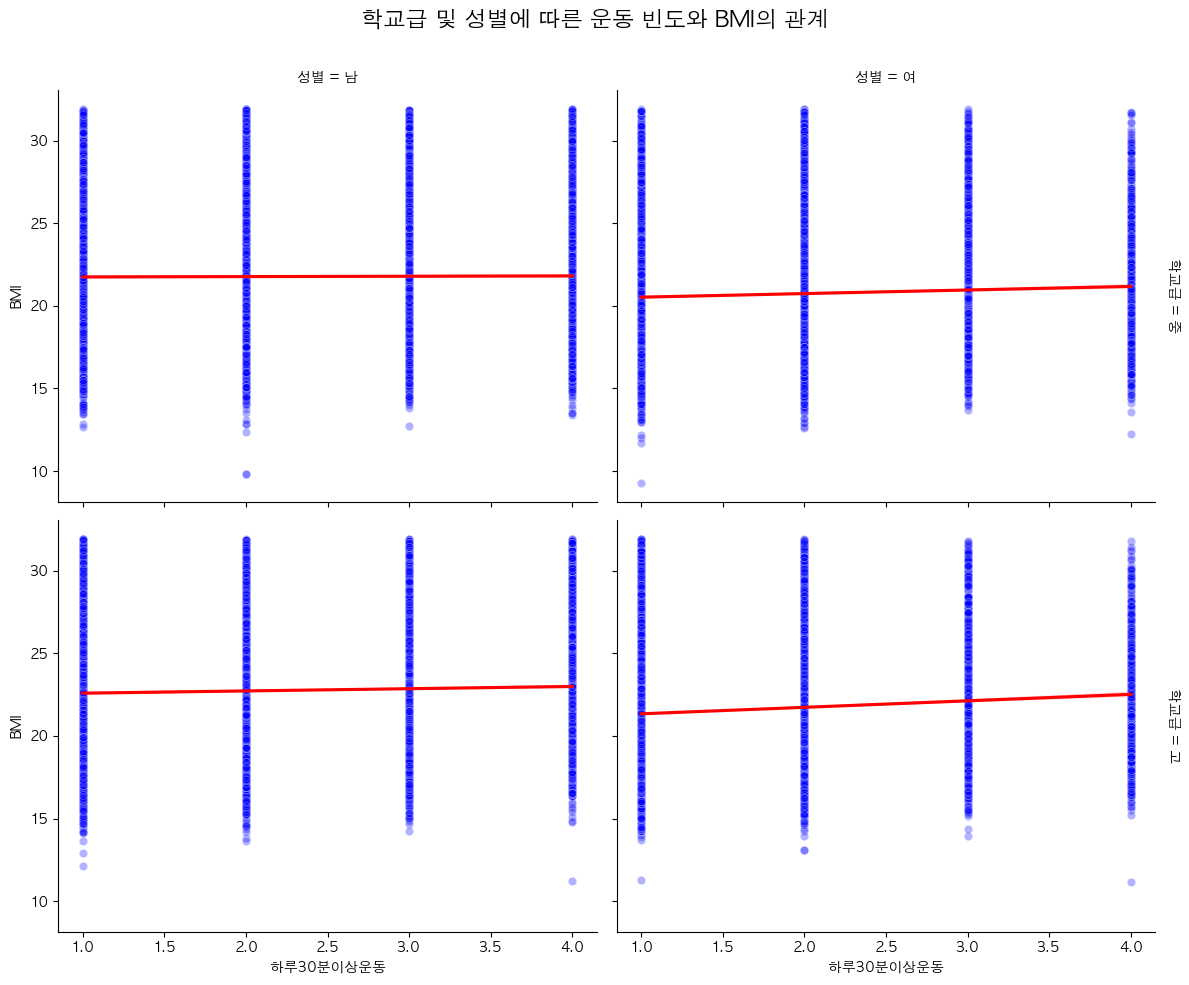

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

print(cleaned_data_exercise_30min)

# FacetGrid를 사용하여 학교급, 성별, 운동 빈도에 따른 BMI의 관계 시각화
g = sns.FacetGrid(
    cleaned_data_exercise_30min, 
    row='학교급', 
    col='성별', 
    margin_titles=True, 
    height=5, 
    aspect=1.2
)

# 산점도와 회귀선을 동시에 표시
g.map(sns.scatterplot, '하루30분이상운동', 'BMI', alpha=0.3, color='blue')  # 산점도
g.map(sns.regplot, '하루30분이상운동', 'BMI', scatter=False, color='red')   # 회귀선

# 축 및 제목 설정
g.set_axis_labels('하루30분이상운동', 'BMI')
plt.subplots_adjust(top=0.9)
g.figure.suptitle('학교급 및 성별에 따른 운동 빈도와 BMI의 관계', fontsize=16)
plt.show()


In [45]:
print("\n학교급 및 성별별 수면 시간과 BMI의 상관계수:")

# 학교급과 성별별로 상관계수 계산
for school_level in cleaned_data_exercise_30min['학교급'].unique():
    for gender in cleaned_data_exercise_30min['성별'].unique():
        subset = cleaned_data_exercise_30min[(cleaned_data_exercise_30min['학교급'] == school_level) & (cleaned_data_exercise_30min['성별'] == gender)]
        if len(subset) > 1:  # 상관계수 계산을 위한 데이터 점수 확인
            corr = subset['하루30분이상운동'].corr(subset['BMI'])
            print(f"{school_level}, {gender} 학생의 상관계수: {corr:.4f}")
        else:
            print(f"{school_level}, {gender} 학생의 데이터가 부족하여 상관계수를 계산할 수 없습니다.")



학교급 및 성별별 수면 시간과 BMI의 상관계수:
중, 남 학생의 상관계수: 0.0056
중, 여 학생의 상관계수: 0.0609
고, 남 학생의 상관계수: 0.0386
고, 여 학생의 상관계수: 0.0992
